In [197]:
from sklearn.externals import joblib
import pandas as pd
from sklearn.metrics import r2_score
from sklearn import linear_model
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import re
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier


init_df = pd.read_csv('/Users/yiyangzhang/CS@Northeastern University/CS7180_AI/Wine-review-Project-master/wine-reviews_data/winemag-data-130k-v2.csv', na_values="?")
init_df.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [4]:
print("Length of dataframe before duplicates are removed:", len(init_df))

Length of dataframe before duplicates are removed: 129971


In [48]:
init_df.describe()

,Unnamed: 0,points,price
count,129971.000000,129971.000000,120975.000000
mean,64985.000000,88.447138,35.363389
std,37519.540256,3.039730,41.022218
min,0.000000,80.000000,4.000000
25%,32492.500000,86.000000,17.000000
50%,64985.000000,88.000000,25.000000
75%,97477.500000,91.000000,42.000000
max,129970.000000,100.000000,3300.000000


In [49]:
init_df.dtypes

Unnamed: 0                 int64
country                   object
description               object
designation               object
points                     int64
price                    float64
province                  object
region_1                  object
region_2                  object
taster_name               object
taster_twitter_handle     object
title                     object
variety                   object
winery                    object
dtype: object

In [5]:
init_df.isnull().sum()

Unnamed: 0                   0
country                     63
description                  0
designation              37465
points                       0
price                     8996
province                    63
region_1                 21247
region_2                 79460
taster_name              26244
taster_twitter_handle    31213
title                        0
variety                      1
winery                       0
dtype: int64

Drop feature region_2 due to the large amount of null elements.

In [7]:
df1 = init_df.drop(["region_2"], axis=1)
df1 = df1.dropna()

## 1. Data Analysis and Visualization

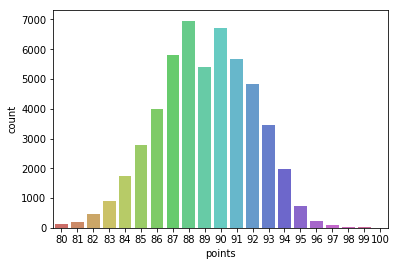

In [8]:
sns.countplot(x='points',data = df1, palette='hls' )
plt.show()

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


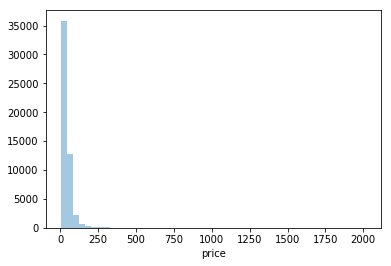

In [9]:
sns.distplot(df1['price'], hist=True,kde=False);

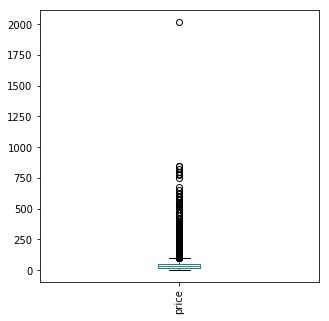

In [11]:
df1.boxplot(['price'], rot=90, figsize=(5,5), grid=False)

In [12]:
# drop the outlier and fill the null with mean value
df2=df1[df1['price']<200]
df2['price'].fillna(df2['price'].mean())
df2.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,title,variety,winery
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
5,5,Spain,Blackberry and raspberry aromas show a typical...,Ars In Vitro,87,15.0,Northern Spain,Navarra,Michael Schachner,@wineschach,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem
6,6,Italy,"Here's a bright, informal red that opens with ...",Belsito,87,16.0,Sicily & Sardinia,Vittoria,Kerin O’Keefe,@kerinokeefe,Terre di Giurfo 2013 Belsito Frappato (Vittoria),Frappato,Terre di Giurfo
9,9,France,This has great depth of flavor with its fresh ...,Les Natures,87,27.0,Alsace,Alsace,Roger Voss,@vossroger,Jean-Baptiste Adam 2012 Les Natures Pinot Gris...,Pinot Gris,Jean-Baptiste Adam
10,10,US,"Soft, supple plum envelopes an oaky structure ...",Mountain Cuvée,87,19.0,California,Napa Valley,Virginie Boone,@vboone,Kirkland Signature 2011 Mountain Cuvée Caberne...,Cabernet Sauvignon,Kirkland Signature


/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


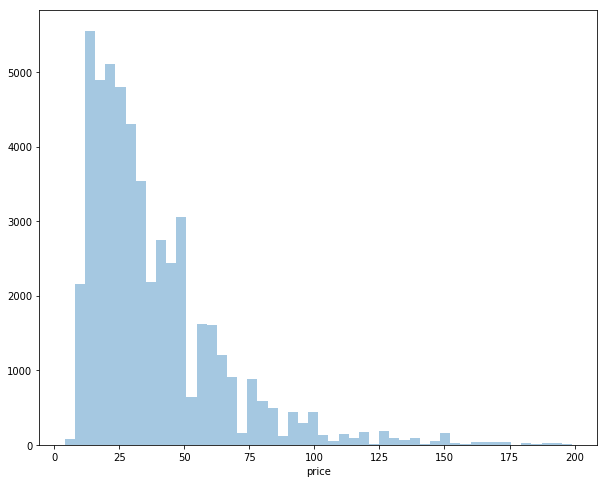

In [13]:
plt.figure(1,figsize=[10,8])
sns.distplot(df2['price'], kde=False);

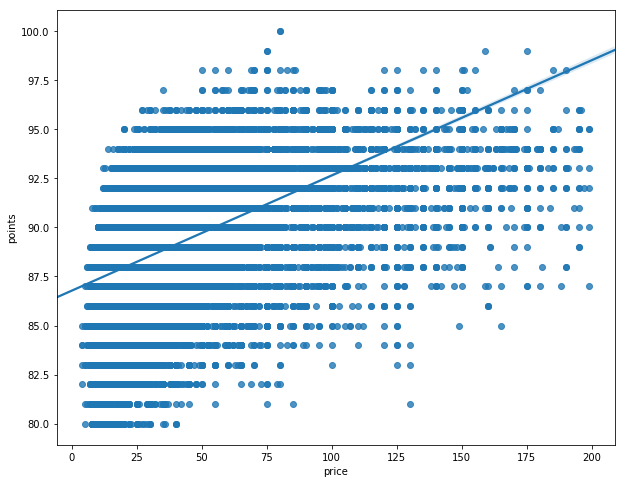

In [14]:
plt.figure(1,figsize=[10,8])
sns.regplot(x='price', y='points', data=df2)

Regression might not be a good approach to using price to predict points or use points to predict price.

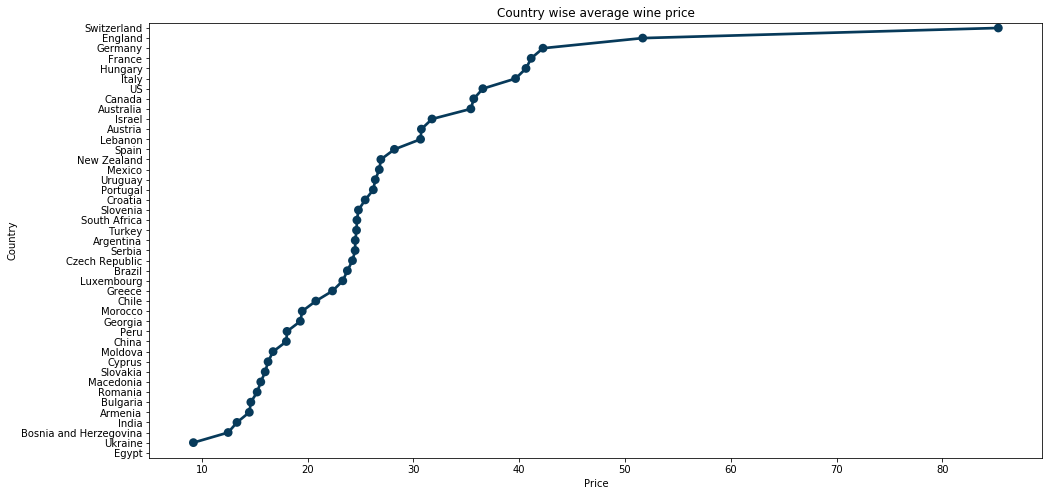

In [45]:
# statistics_price = df['price'].groupby(df['country']).mean()
# mean_value2 = [ statistics_price[i] for i in range(len(statistics_price))]

cnt = init_df.groupby(['country',]).mean()['price'].sort_values(ascending=False).to_frame()

plt.figure(figsize=(16,8))
sns.pointplot(x = cnt['price'] ,y = cnt.index ,color='#073a5a',orient='h',markers='o')
plt.title('Country wise average wine price')
plt.xlabel('Price')
plt.ylabel('Country');

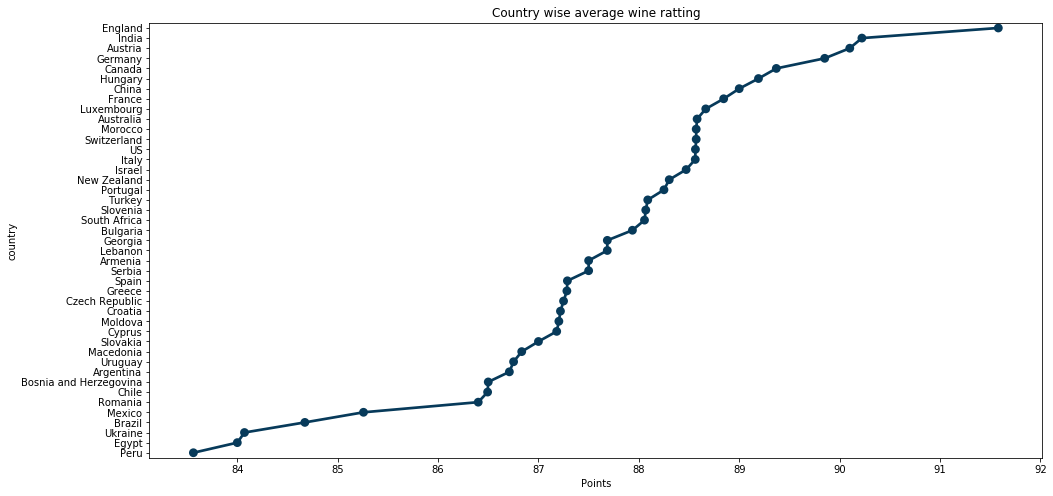

In [46]:
cnt = init_df.groupby(['country']).mean()['points'].sort_values(ascending=False).to_frame()

plt.figure(figsize=(16,8))
sns.pointplot(x = cnt['points'] ,y = cnt.index ,color='#073a5a',orient='h')
plt.title('Country wise average wine ratting')
plt.xlabel('Points');

In [47]:
cnt = init_df.groupby(['country','points'])['price'].agg(['count','min','max','mean']).sort_values(by='mean',ascending=False)[:20]
cnt.reset_index(inplace=True)
cnt.style.background_gradient(cmap='PuBu',high=0.5)

,country,points,count,min,max,mean
0,Germany,98,1,775,775,775
1,France,100,8,150,1500,685.375
2,Australia,99,2,300,850,575
3,Portugal,100,2,450,650,550
4,France,99,3,159,800,506.333
5,Germany,97,7,245,775,464.714
6,Spain,98,1,450,450,450
7,France,98,14,70,1900,449.429
8,Italy,100,4,210,550,372.5
9,France,97,50,45,2000,363.38


## Read country location csv file

In [50]:
# codeCSV = pd.read_csv("wine-reviews_data/country_location.csv")
# codeCSV[:5]

,Abbr,name,Latitude,Longitude
0,AD,Andorra,42.50,1.50
1,AE,United Arab Emirates,24.00,54.00
2,AF,Afghanistan,33.00,65.00
3,AG,Antigua and Barbuda,17.05,-61.80
4,AI,Anguilla,18.25,-63.17


## Merge wine review and country location file

In [158]:
# # init_df = init_df.drop(['Unnamed: 0'], 1)
# # data = data.groupby(['country'], as_index=False).agg({'points': ['count', 'mean'], 'price':['count', 'mean']})
# # init_df = init_df.groupby('country').apply(lambda x : x['country'].count() > 50)
# data = pd.merge(init_df,
#                codeCSV[['name','Abbr','Latitude','Longitude']],
#                left_on="country",
#                right_on="name")
# data[:5]

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,name,Abbr,Latitude,Longitude
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,Italy,IT,42.83,12.83
1,Italy,"Here's a bright, informal red that opens with ...",Belsito,87,16.0,Sicily & Sardinia,Vittoria,NaN,Kerin O’Keefe,@kerinokeefe,Terre di Giurfo 2013 Belsito Frappato (Vittoria),Frappato,Terre di Giurfo,Italy,IT,42.83,12.83
2,Italy,This is dominated by oak and oak-driven aromas...,Rosso,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Masseria Setteporte 2012 Rosso (Etna),Nerello Mascalese,Masseria Setteporte,Italy,IT,42.83,12.83
3,Italy,Delicate aromas recall white flower and citrus...,Ficiligno,87,19.0,Sicily & Sardinia,Sicilia,NaN,Kerin O’Keefe,@kerinokeefe,Baglio di Pianetto 2007 Ficiligno White (Sicilia),White Blend,Baglio di Pianetto,Italy,IT,42.83,12.83
4,Italy,"Aromas of prune, blackcurrant, toast and oak c...",Aynat,87,35.0,Sicily & Sardinia,Sicilia,NaN,Kerin O’Keefe,@kerinokeefe,Canicattì 2009 Aynat Nero d'Avola (Sicilia),Nero d'Avola,Canicattì,Italy,IT,42.83,12.83


### Using groupby to get some related numbers of each country 

In [141]:
# # data = data.apply()
# df_country = data.groupby(['country'], as_index=False).agg({'points': ['count', 'mean'], 'price':['count', 'mean']})
# df_country = df_country.dropna()
# # df_country = data.groupby(['country']).value_counts().loc[lambda x : x>20].reset_index(name='count')
# # print(counts = df_country.groupby('country').count())
# # df_country = df_country.apply(lambda x: x['country, '] > 20)
# df_country 
# # element_group_sizes = df['A'].groupby(df['A']).transform('size')
# # df[element_group_sizes>1]

country points             price           
                            count       mean  count       mean
0                Argentina   3800  86.710263   3756  24.510117
1                  Armenia      2  87.500000      2  14.500000
2                Australia   2329  88.580507   2294  35.437663
3                  Austria   3345  90.101345   2799  30.762772
4   Bosnia and Herzegovina      2  86.500000      2  12.500000
5                   Brazil     52  84.673077     47  23.765957
6                 Bulgaria    141  87.936170    141  14.645390
7                   Canada    257  89.369650    254  35.712598
8                    Chile   4472  86.493515   4416  20.786458
9                    China      1  89.000000      1  18.000000
10                 Croatia     73  87.219178     71  25.450704
11                  Cyprus     11  87.181818     11  16.272727
12          Czech Republic     12  87.250000     12  24.250000
14                  France  22093  88.845109  17776  41.139120
15                 Georgia     86  87.686047     84  19.321429
16                 Germany   2165  89.851732   2120  42.257547
17                  Greece    466  87.283262    461  22.364425
18                 Hungary    146  89.191781    145  40.648276
19                   India      9  90.222222      9  13.333333
20                  Israel    505  88.471287    489  31.768916
21                   Italy  19540  88.562231  16914  39.663770
22                 Lebanon     35  87.685714     35  30.685714
23              Luxembourg      6  88.666667      6  23.333333
24               Macedonia     12  86.833333     12  15.583333
25                  Mexico     70  85.257143     70  26.785714
26                 Moldova     59  87.203390     59  16.745763
27                 Morocco     28  88.571429     28  19.500000
28             New Zealand   1419  88.303030   1378  26.931785
29                    Peru     16  83.562500     16  18.062500
30                Portugal   5691  88.250220   4875  26.218256
31                 Romania    120  86.400000    120  15.241667
32                  Serbia     12  87.500000     12  24.500000
33                Slovakia      1  87.000000      1  16.000000
34                Slovenia     87  88.068966     80  24.812500
35            South Africa   1401  88.056388   1293  24.668987
36                   Spain   6645  87.288337   6573  28.215275
37             Switzerland      7  88.571429      7  85.285714
38                  Turkey     90  88.088889     90  24.633333
39                      US  54504  88.563720  54265  36.573464
40                 Ukraine     14  84.071429     14   9.214286
41                 Uruguay    109  86.752294    109  26.403670

In [162]:
# df_loc = pd.merge(df_country,
#                codeCSV[['name','Latitude','Longitude']],
#                left_on="country",
#                right_on="name")
# # df_loc = df_loc[df_loc['size'] > 100]
# df_loc[:5]

/anaconda3/lib/python3.6/site-packages/pandas/core/reshape/merge.py:543: UserWarning: merging between different levels can give an unintended result (2 levels on the left, 1 on the right)
  warnings.warn(msg, UserWarning)


,"(country, )","(points, count)","(points, mean)","(price, count)","(price, mean)",name,Latitude,Longitude
0,Argentina,3800,86.710263,3756,24.510117,Argentina,-34.00,-64.00
1,Armenia,2,87.500000,2,14.500000,Armenia,40.00,45.00
2,Australia,2329,88.580507,2294,35.437663,Australia,-27.00,133.00
3,Austria,3345,90.101345,2799,30.762772,Austria,47.33,13.33
4,Bosnia and Herzegovina,2,86.500000,2,12.500000,Bosnia and Herzegovina,44.00,18.00


In [163]:
# df_loc.columns.get_values()

array([('country', ''), ('points', 'count'), ('points', 'mean'),
       ('price', 'count'), ('price', 'mean'), 'name', 'Latitude',
       'Longitude'], dtype=object)

### Start mapping (country_geo & marker_cluster &  country choropleth)

In [164]:
# import os
# import folium
# import json
# from folium.plugins import MarkerCluster

# # Add country geo
# country_geo = os.path.join('wine-reviews_data', 'world-countries.json')

# # Define map
# m = folium.Map(location=[48, -20], zoom_start=2,tiles='Stamen Terrain')

# # Define marker
# marker_cluster = MarkerCluster().add_to(m)

# # Setup locations
# locations = df_loc[['Latitude', 'Longitude']]
# locationlist = locations.values.tolist()
# len(locationlist)

# # Process marker
# for point in range(0, len(locationlist)):
#     folium.Marker(
#         locationlist[point],
#         popup = '--Country Name: ' + df_country['country', ''][point] + '  '
#             +'--Points Size: ' + str(df_country[('points', 'size')][point])+ '  '
#             +'--Points Mean: ' + str(df_country[('points', 'mean')][point].round(2)),
#         icon = folium.Icon(color='blue', icon='Ok-sign'),
#     ).add_to(marker_cluster)

# # Set color bin
# # bins = list(df_country[('points', 'mean')].quantile([0, 0.2, 0.4, 0.6,0.8, 1]))

# # Process country choropleth
# folium.Choropleth(
#     geo_data=country_geo,
#     name='choropleth',
#     data=df_country,
#     columns=['country',('points', 'mean')],
#     key_on='feature.properties.name',
#     fill_color='YlOrRd',
#     fill_opacity=0.7,
#     line_opacity=0.2,
#     nan_fill_color = 'white',
#     legend_name='Mean of points for each country.',
# #     bins=bins,
# #     reset=True
# ).add_to(m)

# folium.LayerControl().add_to(m)

# # Show map
# m

KeyError: ('points', 'size')

### Relationship Between country and point

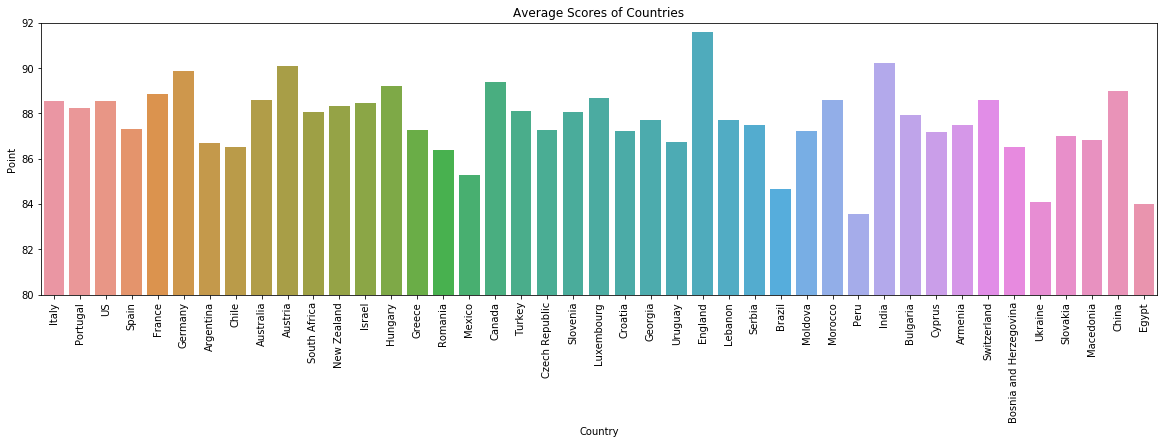

In [168]:
dictionary = {}

for country in init_df.country.unique():
    filt = init_df.country == country
    point = init_df[filt].points.mean()
    dictionary[country]=point

plt.figure(figsize=(20,5))

sns.barplot([k for k,v in dictionary.items()],[v for k,v in dictionary.items()])
plt.title("Average Scores of Countries")
plt.xticks(rotation=90)
plt.ylim(80,92)
plt.xlabel("Country")
plt.ylabel("Point")
plt.show()

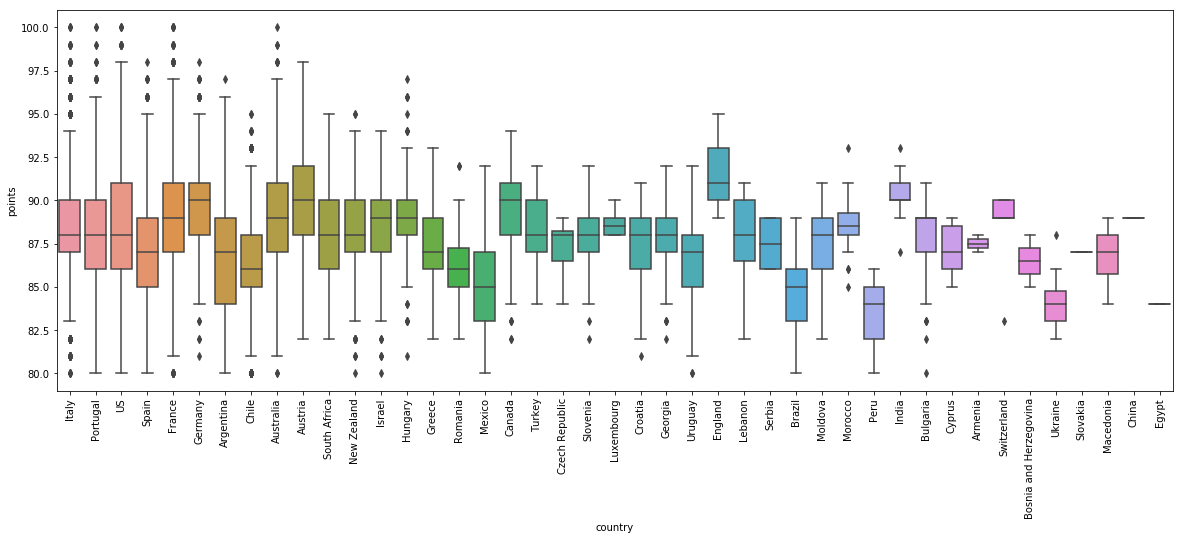

In [170]:
fig, ax = plt.subplots(figsize = (20,7))
chart = sns.boxplot(x='country',y='points', data=init_df, ax = ax)
plt.xticks(rotation = 90)
plt.show()

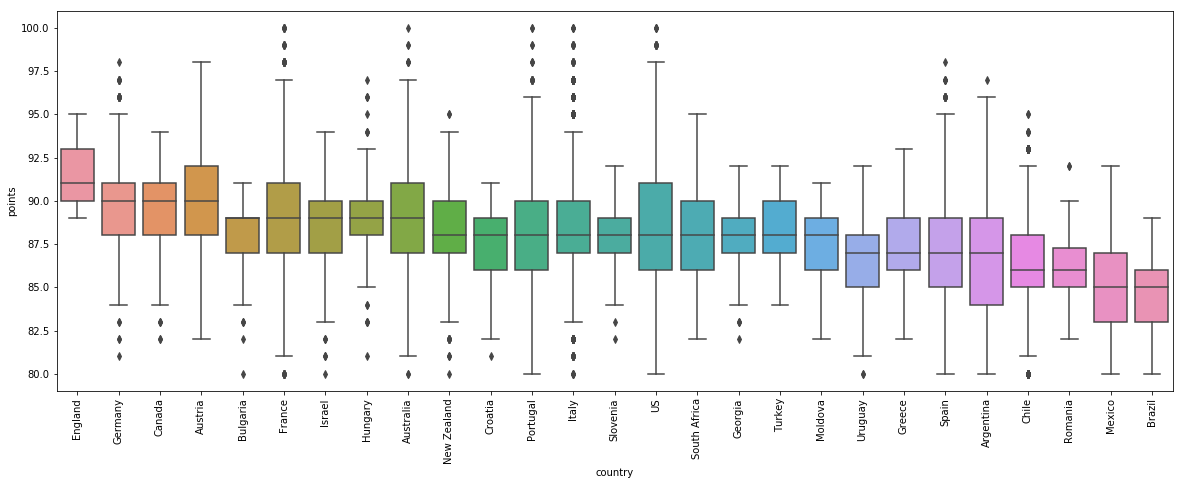

In [171]:
# only pick the country has more than 50 wine reviews
country=init_df.groupby('country').filter(lambda x: len(x) > 50)
df_countryAndPoint = pd.DataFrame({col:vals['points'] for col,vals in country.groupby('country')})
meds = df_countryAndPoint.median()
meds.sort_values(ascending=False, inplace=True)

fig, ax = plt.subplots(figsize = (20,7))
chart = sns.boxplot(x='country',y='points', data=country, order=meds.index, ax = ax)
plt.xticks(rotation = 90)

plt.show()

Since there are only 41 countries in this data set, and from the graph we generated, we can tell the points distribution has some relationship between country and points. So we might keep this feature to do the prediction.

### Relationship between variety and point

In [176]:
init_df['variety'].count()

129970

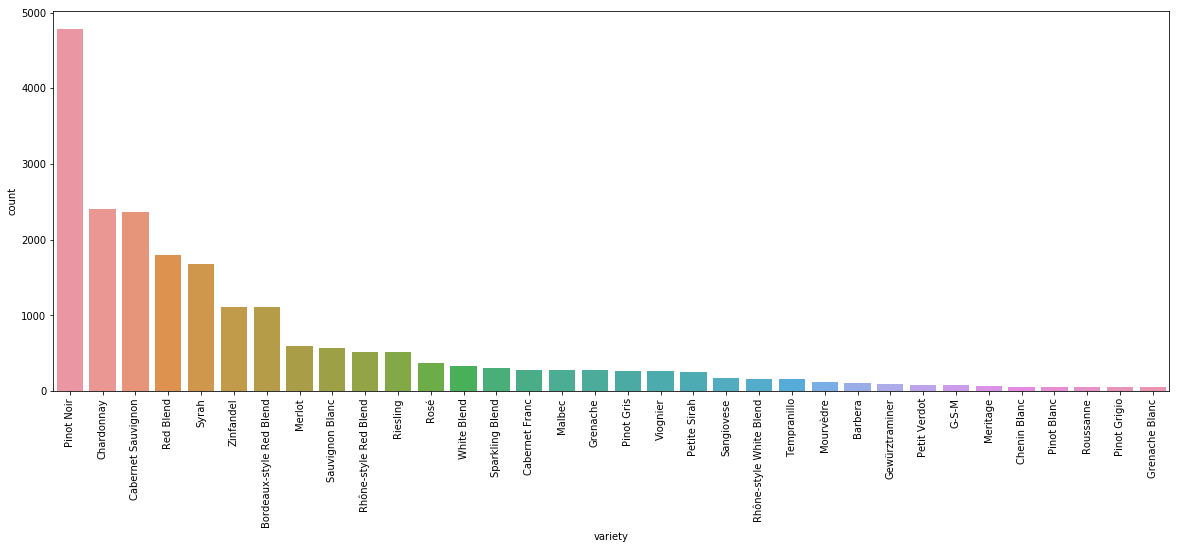

In [172]:
data = init_df.dropna()
data = data.groupby('variety').filter(lambda x: len(x) > 50)
list = data.variety.value_counts().index.tolist()
fig4, ax4 = plt.subplots(figsize = (20,7))
sns.countplot(x='variety', data=data, order = list, ax=ax4)
plt.xticks(rotation = 90)
plt.show()

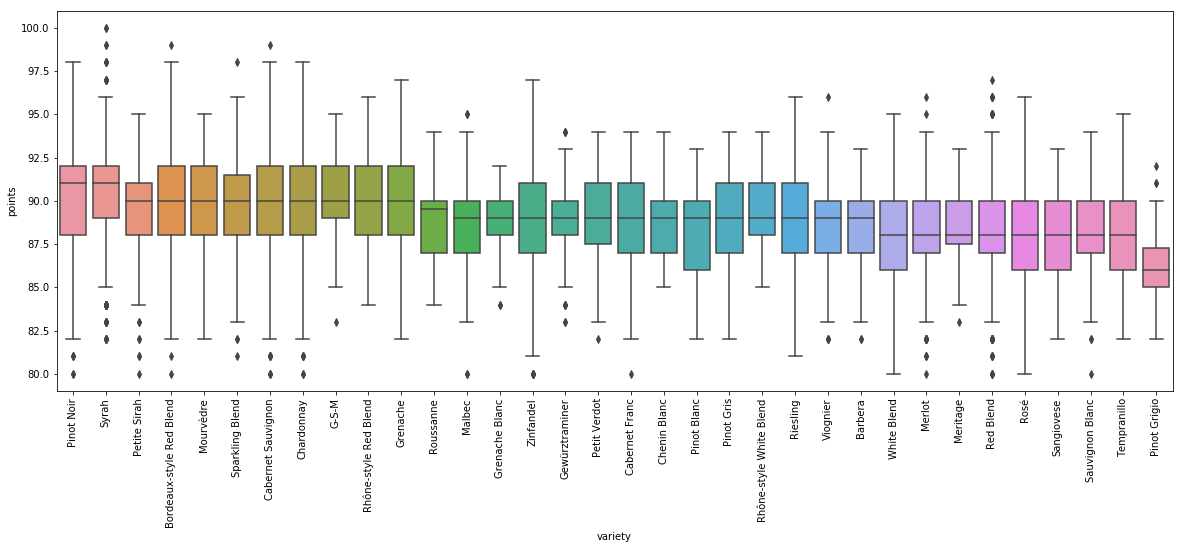

In [177]:
data = data.groupby('variety').filter(lambda x: len(x) > 50)

df4 = pd.DataFrame({col:vals['points'] for col,vals in data.groupby('variety')})
meds3 = df4.median()
meds3.sort_values(ascending=False, inplace=True)

fig3, ax3 = plt.subplots(figsize = (20,7))
chart = sns.boxplot(x='variety',y='points', data=data, order=meds3.index, ax = ax3)
plt.xticks(rotation = 90)
plt.show()

Keep this feature to do the prediction might not have huge significant difference since there are 130k variety feature and the points distribution is not varied a lot even for the different variety.

In [205]:
df_province = init_df.groupby(['country', 'province'])
df_province = df_province[df_province['country'] == 'US']
df_province

KeyError: 'Column not found: False'

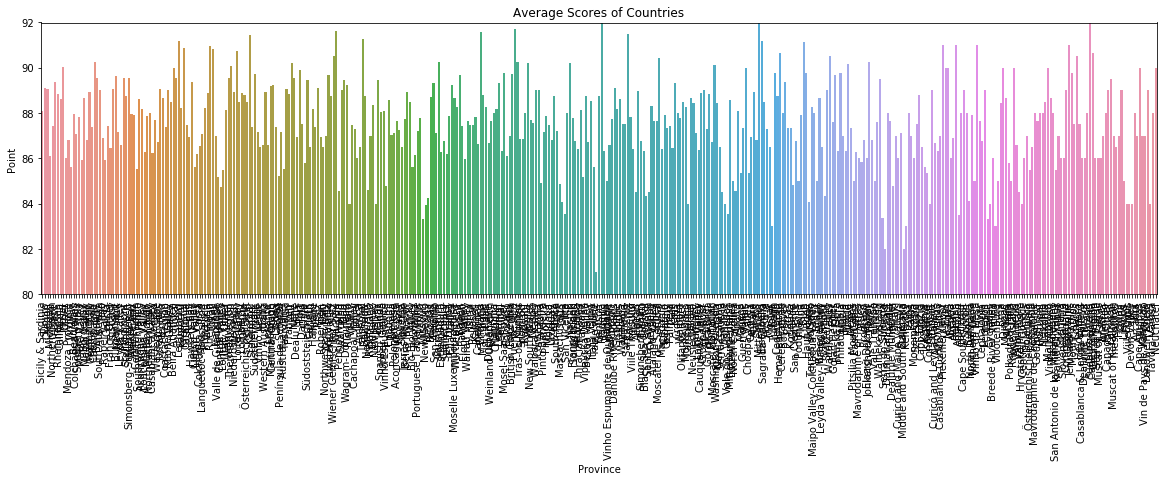

In [185]:
df_province = init_df.groupby('country')['province'].apply(lambda x : x['country'] == 'US')

dictionary = {}

for province in init_df.province.unique():
    filt = init_df.province == province
    point = init_df[filt].points.mean()
    dictionary[province]=point

plt.figure(figsize=(20,5))

sns.barplot([k for k,v in dictionary.items()],[v for k,v in dictionary.items()])
plt.title("Average Scores of Countries")
plt.xticks(rotation=90)
plt.ylim(80,92)
plt.xlabel("Province")
plt.ylabel("Point")
plt.show()